<a href="https://ibb.co/FW1ZZYW"><img src="https://i.ibb.co/X4P0054/cardiovasculardisease.jpg" alt="cardiovasculardisease" width="1000"></a>

# Cardio Disease Classification

# Notebook 3 - classification:

### Content:
Features:

age | int (days)  
height | int (cm)   
weight | float (kg)   
gender | categorical code   
Systolic | ap_hi | int   
Diastolic | ap_lo | int   
Cholesterol |  1: normal, 2: above normal, 3: well above normal   
Glucose | 1: normal, 2: above normal, 3: well above normal   
Smoking | binary   
Alcohol intake | binary   
Physical activity | binary   
Presence or absence of cardiovascular disease |binary   
## to get the most from our data we will make 2 more features wich will be explained later. 


kaggle link - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Imports and read form csv:

In [1]:
# Basic imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# preprocessing and split
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Scores and reports
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
df = pd.read_csv('data/data.csv')


## Basic info:

In [2]:
df.shape

(70000, 14)

In [3]:
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.tail()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,56.273973,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [6]:
df.isna().sum()

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no null values!  
And all the values are numeric.

## Preproces Data:

### Clean the data

#### We can see that there are some unnecessary columns, so we can throw them

In [7]:
# Drop id col
df.drop(['id'], axis = 1, inplace= True)
# Round float
df['age_year'] = df['age_year'].round(0)
df['weight'] = df['weight'].round(0)
# There are some errors in the data ap_hi always biger then ap_lo 
# lats drop this errors:
df = df[df['ap_lo']<df['ap_hi']]

df.reset_index()

,index,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68759,69995,19240,53.0,2,168,76.0,120,80,1,1,1,0,1,0
68760,69996,22601,62.0,1,158,126.0,140,90,2,2,0,0,1,1
68761,69997,19066,52.0,2,183,105.0,180,90,3,1,0,1,0,1
68762,69998,22431,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
df

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,61.0,1,163,72.0,135,80,1,2,0,0,0,1


### Add features

#### BMI - 
```"BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height." - wikipedia```

<a href="https://ibb.co/t3K5F8Q"><img src="https://i.ibb.co/V39852J/BMI.png" alt="BMI" border="0"></a>

In [9]:
# add BMI:
df['BMI'] = (df["weight"] / (df["height"]/100)**2).astype(np.int)

#### MAP - 
```"The mean arterial pressure (MAP) is an average blood pressure in an individual during a single cardiac cycle." - wikipedia```

<a href="https://ibb.co/ZcfFBmF"><img src="https://i.ibb.co/CVwYb2Y/arterial-pressure-pulse-profile.png" alt="arterial-pressure-pulse-profile" border="0"></a>

In [10]:
# add MAP:
df['MAP'] = (((df["ap_lo"]*2) + df["ap_hi"])/3).round(0)

Our new dataframe:

In [11]:
df.head()

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21,90.0
1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34,107.0
2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23,90.0
3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28,117.0
4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23,73.0


## Visualization:

### Lets see how the data split between the class

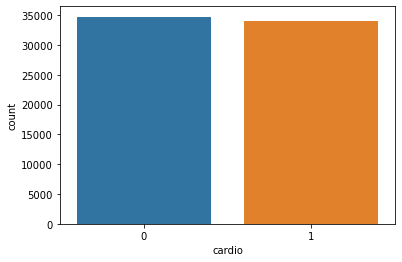

In [12]:
sns.countplot(df['cardio']) # count the number of patients with or witout cardio.

### The number of patients is divided almost equally!

### Now lats correlation between features:

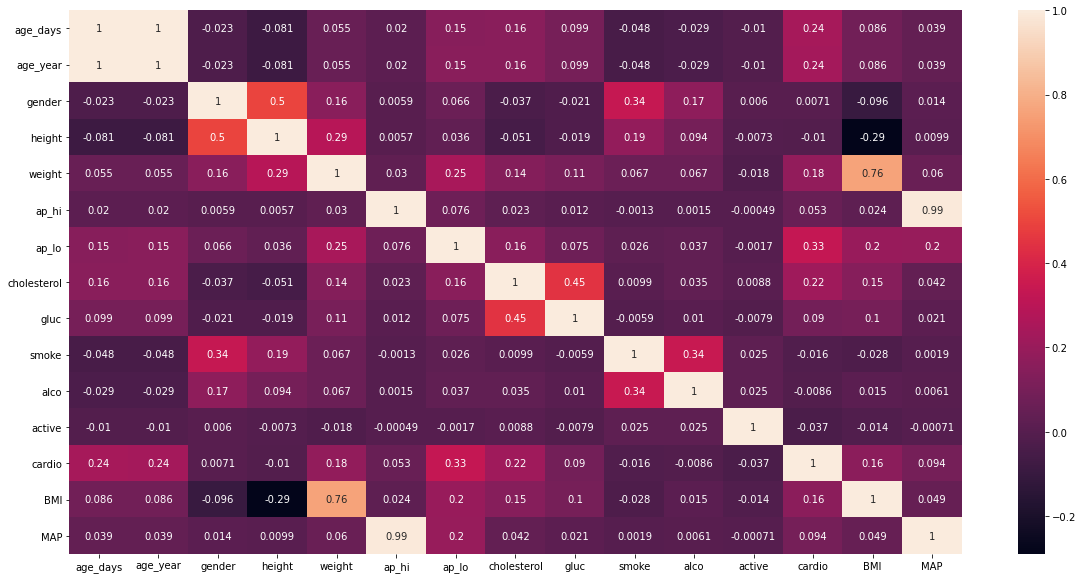

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### At first glance we can't find strong correlation between features

## Lets test every featur by itself:

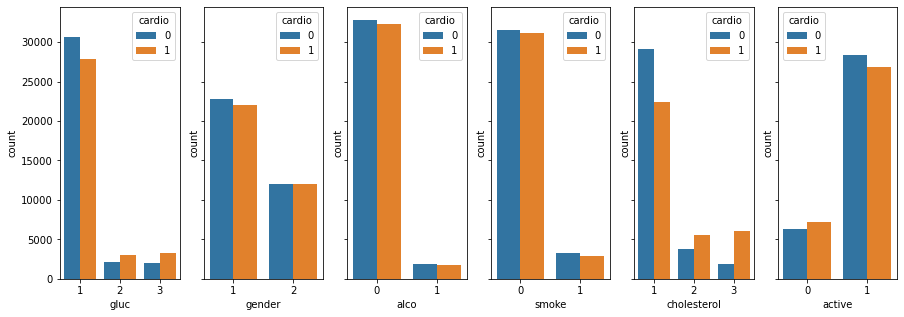

In [14]:
f, axes = plt.subplots(1, 6, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gluc',data=df,hue='cardio' , ax=axes[0])
sns.countplot(x='gender',data=df,hue='cardio', ax=axes[1] )
sns.countplot(x='alco',data=df,hue='cardio' , ax=axes[2])
sns.countplot(x='smoke',data=df,hue='cardio' , ax=axes[3])
sns.countplot(x='cholesterol',data=df,hue='cardio', ax=axes[4])
sns.countplot(x='active',data=df,hue='cardio' , ax=axes[5])


We can see that our intuition is pretty good apart from the smoking and alcohol that behave differently than expected.

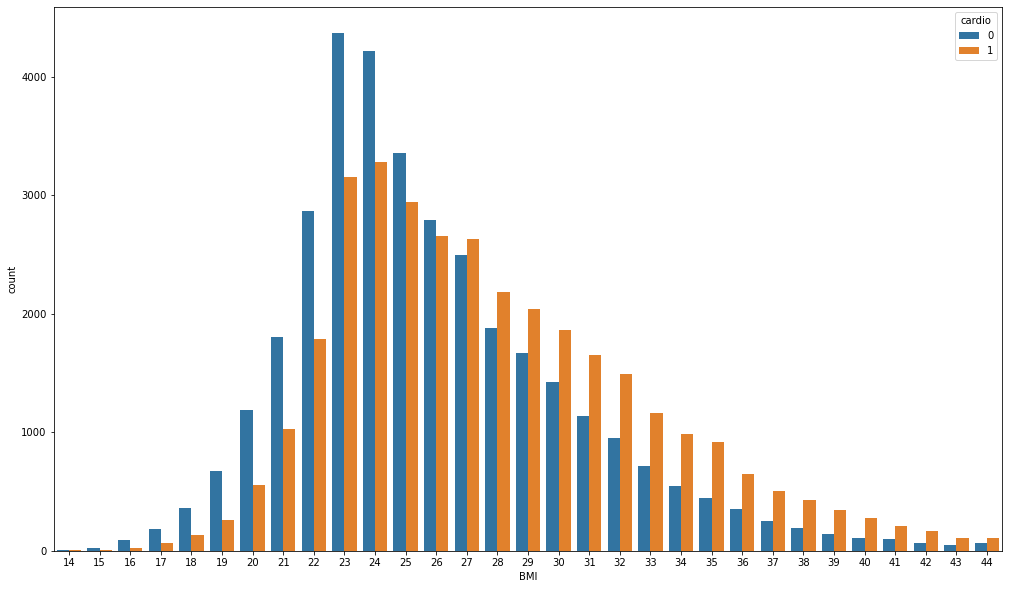

In [15]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['BMI'] < 45) & (df['BMI'] > 13) ], x='BMI', hue='cardio')
plt.show()

 It can be seen that as the BMI increases the number of cardio increases

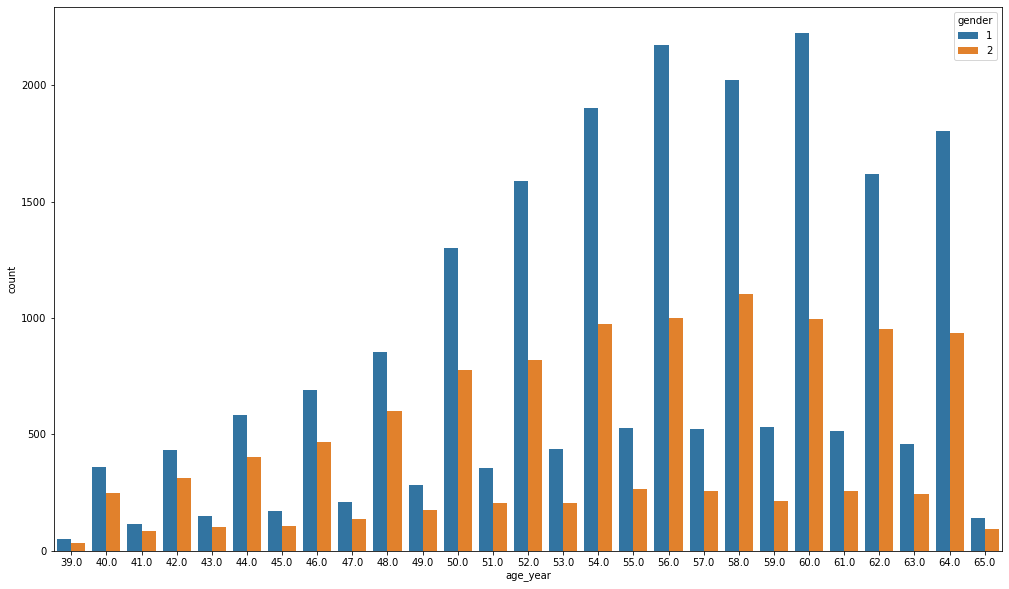

In [16]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['cardio'] == 1)], x='age_year' ,hue='gender')
plt.show()

It can be seen that as age increases there are more cardio disease. and men are sicker than women and at an earlier age.

Now we can drop 'age_year' because it's less specific from 'age_days'

In [17]:
df.drop(['age_year'], axis = 1, inplace= True)

## Models:

In [18]:
# Split Data
y = df['cardio']
x = df.drop(['cardio'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)
scal_x = pd.DataFrame(StandardScaler().fit(x).transform(x),columns=x.columns)

## searching for optimal value of K for knn, with Cross validation score (I will explain later what Cross validation is):

In [19]:
# k_range = [10,50,100,200]
# k_scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     Optional_K = cross_val_score(knn, scal_x, y, cv=10)
#     k_scores.append(Optional_K.mean())
#     print('.')
# print(k_scores)

In [20]:
# plt.plot(k_range, k_scores)
# plt.xlabel('K for knn')
# plt.ylabel('Cross validated score')

K = 100 is optimal!

## Modeling: 

In [21]:
KNN = KNeighborsClassifier(n_neighbors=100).fit(scal_x_train, y_train)
LR = LogisticRegression().fit(scal_x_train, y_train)
Dummy = DummyClassifier(strategy='most_frequent').fit(scal_x_train, y_train)

### Lats test our models:

In [22]:
# Simpel score test:
print("KNeighborsClassifier mean accuracy: {:.2f}%".format(KNN.score(scal_x_test, y_test)*100))
print("LogisticRegression mean accuracy: {:.2f}%".format(LR.score(scal_x_test, y_test)*100))
print("DummyClassifier mean accuracy: {:.2f}%".format(Dummy.score(scal_x_test, y_test)*100))


KNeighborsClassifier mean accuracy: 70.41%
LogisticRegression mean accuracy: 71.95%
DummyClassifier mean accuracy: 50.83%


In [23]:
# List of all model and there names:
model = [(Dummy, "DummyClassifier"), (LR, "LogisticRegression"),(KNN, "KNeighborsClassifier")]

### Cross validation score:

<a href="https://ibb.co/TLZb4Lm"><img src="https://i.ibb.co/Zm3YBmW/2021-03-14-18-22-49.png" alt="2021-03-14-18-22-49" border="0"></a>

Taken from: ```https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb```

In [24]:
# for i,j in model:
#     cv_score = cross_val_score(i, scal_x, y, cv=10)
#     print(j, "cross val score is:", cv_score.mean())

### classification report and confusion matrix:

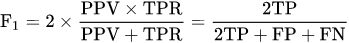

In [25]:
# for i , j in model:
#     train_pred = i.predict(scal_x_train)
#     y_pred = i.predict(scal_x_test)

    
#     print( j,' Classification Report')
#     print(classification_report(y_test, y_pred))

#     cm = confusion_matrix(y_test, y_pred)
#     plt.subplots()
#     sns.heatmap(cm,fmt=".0f", annot=True)
#     plt.xlabel("Predict")
#     plt.ylabel("Test")
#     plt.show()

## ROC curve and AUC:

### The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
### The larger the area under the curve (AUC) the better!

$$\text{TPR} = \frac{TP}{TP + FN}$$  
$$\text{FPR} = \frac{FP}{TN + FP}$$  
$$\mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}$$

Text(0, 0.5, 'True Positive Rate')

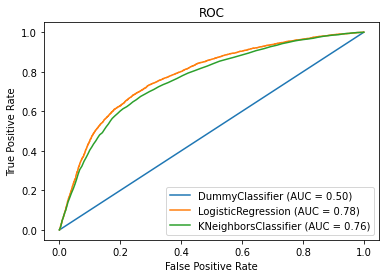

In [26]:
#ROC curves
plot = plt.subplot(title = 'ROC')
plot_roc_curve(Dummy,scal_x_test, y_test, ax = plot, name= 'DummyClassifier')
plot_roc_curve(LR,scal_x_test, y_test, ax = plot, name= 'LogisticRegression')
plot_roc_curve(KNN,scal_x_test, y_test, ax = plot, name= 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


## Logistic Regression model is the best for this case

# improving the model:

### we will try to improv by using Decision Tree and Ada Boost

In [130]:
DT = DecisionTreeClassifier(max_depth=2)
DT.fit(scal_x_train, y_train)
print("DecisionTreeClassifier mean accuracy: {:.2f}%".format(DT.score(scal_x_test, y_test)*100))

DecisionTreeClassifier mean accuracy: 70.90%


#### Note that DecisionTree alone does not improve the result
#### But with AdaBoost we can improve the mean accuracy by 1.3% !

In [132]:
Ada = AdaBoostClassifier(
    DT,n_estimators=220,algorithm="SAMME.R",learning_rate=0.37
    )
Ada.fit(scal_x_train, y_train)
print("AdaBoostClassifier mean accuracy: {:.2f}%".format(Ada.score(scal_x_test, y_test)*100))

AdaBoostClassifier mean accuracy: 73.26%


### Now i will try to reduce dimensionality by hand:

In [32]:
# Chacking the importance for etch feature
for n,s in zip(x.columns, Ada.feature_importances_):
    print(n, s)

age_days 0.3174777086525727
gender 0.012575652360627238
height 0.1000510692726182
weight 0.11634966666333452
ap_hi 0.13073949476892646
ap_lo 0.04315575943556106
cholesterol 0.05634069838975731
gluc 0.02283089502656736
smoke 0.008248823040042838
alco 0.008816535945941084
active 0.011790519886686916
BMI 0.08163119646932648
MAP 0.08999198008803769


We can see that some features is under 0.05 so we will drop tham:

In [51]:
df1 = df.drop(['smoke','alco','active','gender','gluc','ap_lo' ], axis = 1)
df1

,age_days,height,weight,ap_hi,cholesterol,cardio,BMI,MAP
0,18393,168,62.0,110,1,0,21,90.0
1,20228,156,85.0,140,3,1,34,107.0
2,18857,165,64.0,130,3,1,23,90.0
3,17623,169,82.0,150,1,1,28,117.0
4,17474,156,56.0,100,1,0,23,73.0
...,...,...,...,...,...,...,...,...
69995,19240,168,76.0,120,1,0,26,93.0
69996,22601,158,126.0,140,2,1,50,107.0
69997,19066,183,105.0,180,3,1,31,120.0
69998,22431,163,72.0,135,1,1,27,98.0


### Lats try to fit the new Data Frame with the same model:

In [52]:
# Split Data
y1 = df1['cardio']
x1 = df1.drop(['cardio'], axis =1)

#split x and y to trin and test
x1_train , x1_test , y1_train , y1_test = split(x1,y1 ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x1_train = pd.DataFrame(StandardScaler().fit(x1_train).transform(x1_train),columns=x1.columns)
scal_x1_test = pd.DataFrame(StandardScaler().fit(x1_train).transform(x1_test),columns=x1.columns)
scal_x1 = pd.DataFrame(StandardScaler().fit(x1).transform(x1),columns=x1.columns)

In [133]:
Ada = AdaBoostClassifier(
    DT,n_estimators=220,algorithm="SAMME.R",learning_rate=0.37
    )
Ada.fit(scal_x1_train, y1_train)
print("AdaBoostClassifier mean accuracy: {:.2f}%".format(Ada.score(scal_x1_test, y1_test)*100))

AdaBoostClassifier mean accuracy: 72.76%


## we can see that the result is still Better from the first model(Logistic Regression) with almost half of the features!!

# Now lats use PCA 

In [55]:
from sklearn.decomposition import PCA

In [183]:
# Split Data
y2 = df['cardio']
x2 = df.drop(['cardio'], axis =1)
col = x2.columns
x2 = StandardScaler().fit_transform(x2)

pd.DataFrame(data = x2, columns = col)


,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,MAP
0,-0.433968,1.366936,0.444443,-0.845292,-0.121393,-0.128458,-0.537162,-0.394760,-0.310399,-0.237376,0.494591,-0.992054,-0.133197
1,0.309472,-0.731563,-1.020653,0.759645,0.071903,0.903143,2.408877,-0.394760,-0.310399,-0.237376,0.494591,1.146842,0.189765
2,-0.245981,-0.731563,0.078169,-0.705732,0.007471,-1.160059,2.408877,-0.394760,-0.310399,-0.237376,-2.021874,-0.662993,-0.133197
3,-0.745929,1.366936,0.566534,0.550306,0.136335,1.934743,-0.537162,-0.394760,-0.310399,-0.237376,0.494591,0.159659,0.379743
4,-0.806295,-0.731563,-1.020653,-1.263972,-0.185825,-2.191659,-0.537162,-0.394760,-0.310399,-0.237376,-2.021874,-0.662993,-0.456158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68759,-0.090811,1.366936,0.444443,0.131626,-0.056961,-0.128458,-0.537162,-0.394760,3.221664,-0.237376,0.494591,-0.169402,-0.076203
68760,1.270879,-0.731563,-0.776470,3.620621,0.071903,0.903143,0.935857,1.355193,-0.310399,-0.237376,0.494591,3.779329,0.189765
68761,-0.161306,1.366936,2.275812,2.155243,0.329631,0.903143,2.408877,-0.394760,-0.310399,4.212719,-2.021874,0.653250,0.436736
68762,1.202004,-0.731563,-0.166014,-0.147493,0.039687,-0.128458,-0.537162,1.355193,-0.310399,-0.237376,-2.021874,-0.004872,0.018785


In [179]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3','4','5','6','7','8'])
principalDf["cardio"] = y2
principalDf

,1,2,3,4,5,6,7,8,cardio
0,-1.094866,-0.954732,0.960394,-0.117537,-0.623521,-0.594277,0.306502,-0.214584,0.0
1,1.608210,1.444273,-1.341748,-0.346016,0.474949,-0.500862,0.139493,-0.529062,1.0
2,-0.599239,0.817126,0.039233,-1.371233,-0.608718,2.134964,-0.281823,0.235680,1.0
3,0.957138,-1.063063,0.240676,0.911607,-0.814775,-0.932670,0.136196,-1.597939,1.0
4,-2.329062,1.085595,0.769170,0.202441,0.211751,2.431041,-0.289083,0.789372,0.0
...,...,...,...,...,...,...,...,...,...
68759,0.035440,-2.521969,0.378129,0.076141,0.879725,-0.363807,-0.185492,0.460247,0.0
68760,4.040876,1.347065,-3.539500,1.337022,0.273363,-0.364436,0.484159,0.952283,0.0
68761,2.984364,-3.148663,-1.037736,-0.498368,0.300769,1.995248,-1.009536,-0.599392,1.0
68762,0.136090,0.992902,-0.297073,-0.600669,-0.841506,1.403759,-1.396826,0.635685,1.0


In [180]:
x2_train , x2_test , y2_train , y2_test = split(principalComponents,y2 ,train_size = 0.8 , shuffle = True , random_state = 1)

In [185]:
Ada = AdaBoostClassifier(
    DT,n_estimators=220,algorithm="SAMME.R",learning_rate=0.37
    )
Ada.fit(x2_train, y2_train)
print("AdaBoostClassifier mean accuracy: {:.2f}%".format(Ada.score(x2_test, y2_test)*100))

AdaBoostClassifier mean accuracy: 70.92%


### This time PCA did not work so well for us...

## To conclude the best result we have reached is 72.76% percent with only 8 features compared to the 14 we had at the beginning. we get this result by manually looking for the least important features and remove them.